<a href="https://colab.research.google.com/github/saveugenio/App-Physics-157/blob/master/AA2_Eugenio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check

*   List item
*   List item

that the mount was successful.

In [4]:
!ls drive/My\ Drive

 0001-17824530857_20210305_154203_0000.png
'1544(Eugenio,S).pdf'
 20230310_164855.jpg
 20230515_184231.jpg
'20230615_155842 (1).jpg'
 20230615_155842.jpg
 20230727_122630.jpg
 20230824_153307.jpg
 2023-Residence-Hall-Agreement-Final_07282023.gdoc
 20s.gsheet
 2x2.jpg
 421664637_742310301181229_3881557948928034532_n-removebg-preview.png
'AA10_EugenioSA (1).docx'
'AA10_EugenioSA (2).docx'
 AA10_EugenioSA.docx
'AA11_EugenioSA (1).docx'
'AA11_EugenioSA (1).gdoc'
 AA11_EugenioSA.docx
 AA11_EugenioSA.gdoc
'AA3_Eugenio (1).docx'
 AA3_Eugenio.docx
 AA3_Eugenio.gdoc
 AA5_EugenioSA.docx
 AA6_EugenioSA.docx
 AA7_EugenioSA.docx
 AA8_EugenioSA.docx
'Affidavit_Eugenio_Sandre Ann.pdf'
'Anthropometric measurements_EugenioSA.docx'
 Ap157
'authorization letter.pdf'
'Bio 11 Midyear Schedule.pdf'
 Classroom
'Colab Notebooks'
'Copy of Grades_Eugenio_Sandre Ann.pdf'
'Course Guide Agreement_EugenioSA.docx'
'crs (1).PNG'
 crs.PNG
 DB3.gdoc
'Dormer'\''s Instruction Sheet (2022).docx.gdoc'
'Dormer'\''s Instruct

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [5]:
file_path = "/content/drive/My Drive/Ap157/Datasets/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [6]:
import numpy as np
import os
import sys
import pandas as pd

data = np.load(file_path + "galaxy_catalogue.npy")

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [7]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

Calculate ratios and select specific columns as features

Note the following terms:

**u-g** : color index between the ultraviolet and green bands

**g-r** : color index between the green and red bands

**r-i** : color index between the red and infrared bands

**i-z** : color index between the infrared and near-infrared bands

In [8]:
# store the data in a DataFrame and process them to create input features and target classes
data_array = pd.DataFrame(data)

#For data processing, we create these new arrays
R_u = data_array['petroR50_u']/data_array['petroR90_u']
R_r = data_array['petroR50_r']/data_array['petroR90_r']
R_z = data_array['petroR50_z']/data_array['petroR90_z']


#Create an array containing the selected features (color indices, eccentricity, magnitudes in the bands, ratios of petrosian radius to bands)
Tfeatures = np.array([data_array['u-g'],
                      data_array['g-r'],
                      data_array['r-i'],
                      data_array['i-z'],
                      data_array['ecc'],
                      data_array['m4_u'],
                      data_array['m4_g'],
                      data_array['m4_r'],
                      data_array['m4_i'],
                      data_array['m4_z'],
                      R_u, R_r, R_z,])
features = np.transpose(Tfeatures) #Each row corresponds to the observation, each column corresponds to feature

targets = data_array['class'] #Extract the target classes

print("Features shape:", features.shape)
print("Targets shape:", targets.shape)
print(targets)


#credits to Kaye and her sources for the code

Features shape: (780, 13)
Targets shape: (780,)
0      merger
1      merger
2      merger
3      merger
4      merger
        ...  
775    spiral
776    spiral
777    spiral
778    spiral
779    spiral
Name: class, Length: 780, dtype: object


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Define a function that takes a set of features and their corresponding target classes. It the splits the data into training set and test set. It will also train a decision tree classifier on the training data.Then, it returns the predicted classes.

In [23]:
def predict_class(features, targets):
    # Split the data into a training set (80%) and test dataset (20%)
    x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

    # Create an instance of the decision tree classifier
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train, y_train)

    # Train the classifier on a given dataset
    classifier.fit(x_train, y_train)

    #  make predictions on the test dataset
    predicted_class = classifier.predict(x_test)

    return predicted_class, y_test

Evaluate the performance of the classifier by comparing its predictions with the actual labels.

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

#Calculate the accuracy
accuracy = accuracy_score(actual_class, predicted_class)
print("Accuracy: ", accuracy)

#Calculate confusion matrix
conf_matrix = confusion_matrix(actual_class, predicted_class)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy:  0.7371794871794872
Confusion Matrix:
[[48  7  0]
 [ 4 35 10]
 [ 0 20 32]]


In [30]:
#to provide a comprehensive summary of the performance of the classifier, here's a classification report

from sklearn.metrics import classification_report

classification_rep = classification_report(actual_class, predicted_class)
print("classification report:", classification_rep)

classification report:               precision    recall  f1-score   support

  elliptical       0.92      0.87      0.90        55
      merger       0.56      0.71      0.63        49
      spiral       0.76      0.62      0.68        52

    accuracy                           0.74       156
   macro avg       0.75      0.73      0.74       156
weighted avg       0.76      0.74      0.74       156



Create a heatmap visualization of the confusion matrix

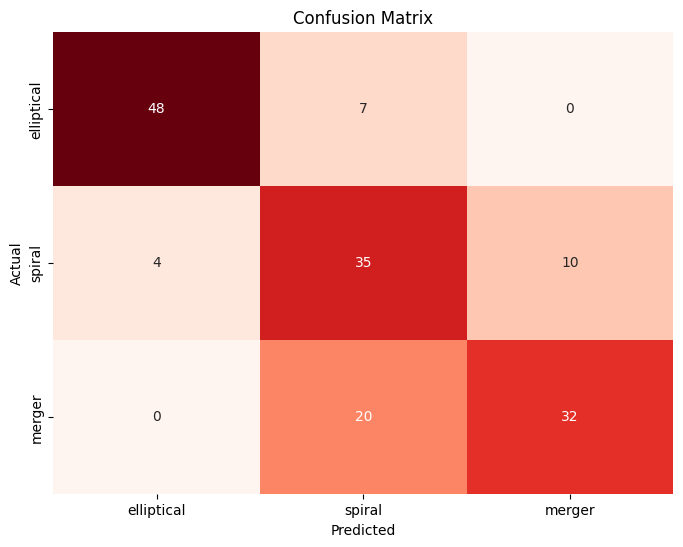

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['elliptical', 'spiral', 'merger'],
            yticklabels=['elliptical', 'spiral', 'merger'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()